In [18]:
# 보스턴 주책가격 딥러닝
from tensorflow.keras.datasets.boston_housing import load_data
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=777)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


In [19]:
# 전처리, 표준화
# minmax normalization
# robust normalization
# standardization

import numpy as np
# 평균
mean = np.mean(x_train, axis = 0)
# 표준편차
std = np.std(x_train, axis = 0) # 표준편차값
# 표준화값
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

In [20]:
# 분리
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.33, random_state = 777)

In [21]:
# 모델
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (13,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # 출력값 1개 # 시그모이드하면 안됨 0~1이니깐 

In [22]:
# mse 평균 제곱오차
# mae 평균 절대오차
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

In [17]:
# 학습
history = model.fit(x_train, y_train, epochs = 2, validation_data = (x_val, y_val))

Epoch 1/2


InternalError:  Blas GEMM launch failed : a.shape=(32, 13), b.shape=(13, 64), m=32, n=64, k=13
	 [[node sequential/dense/MatMul (defined at <ipython-input-17-dd3655120d6a>:2) ]] [Op:__inference_train_function_638]

Function call stack:
train_function


In [7]:
model.evaluate(x_test, y_test)

AttributeError: module 'tensorflow' has no attribute 'ConfigProto'

In [6]:
results = model.predict(x_test)
xval = range(len(x_test))

NameError: name 'model' is not defined

NameError: name 'xval' is not defined

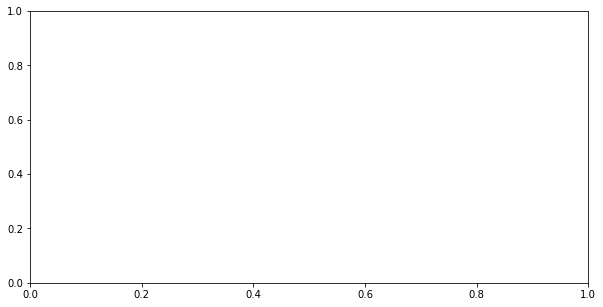

In [7]:
# 학습 결과 확인
# loss, acc, val_loss, val_acc를 그래프로 출력
# 훈련 및 검증데이터의 손실값을 그래프로 출력
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.plot(xval, results, color = 'blue', label = 'predict_value')
ax1.plot(xval, y_test, color = 'orange', label = 'real_value')
ax1.set_title('predict and real value')
ax1.set_xlabel('data')
ax1.set_ylabel('price')
ax1.legend()
plt.show()


In [23]:
# 교차검증 // 과대적합 방지
# hold out 검증 : 데이터셋 무작위 선택,
# kfold 검증 : 데이터 k개 그룸으로 분리하고 1개는 검증 나머지는 학습
from sklearn.model_selection import KFold
from tensorflow.keras.datasets.boston_housing import load_data
(x_train, y_train), (x_test, y_test) = load_data(path='boston_housing.npz', test_split=0.2, seed=777)

In [ ]:
k = 3
kfold = KFold(n_splits = k)
def get_model() :
    model = Sequential()
    model.add(Dense(64, activation = 'relu', input_shape = (13,)))
    model.add(Dense(32, activation = 'relu'))
    model.add(Dense(1)) # 출력값 1개 # 시그모이드하면 안됨 0~1이니깐 
    model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])
    return model
mae_list = []
for train_index, val_index in kfold.split(x_train) :
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    model = get_model()
    model.fit(x_train_fold, y_train_fold, epochs = 300, validation_data = (x_val_fold, y_val_fold))
    # 평가 : 손실함수값, 평가기준값
    _, test_mae = model,evaluate(x_test, y_test)
    mae_list.append(test_mae)
# 최종결과
print('결과 :', np.mean(mae_list))

In [ ]:
# 산점도를 이용하여 실제 주택가격과 예측가격 시각화하기
results = model.predict(x_test)

In [1]:

import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.plot(y_test, results, 'b.')
plt.axis([min(y_test), max(y_test)], [min(results), max(results)], ls='--', c='.3')
plt.set_xlabel('y_test')
plt.set_ylabel('results')
plt.show()

NameError: name 'y_test' is not defined

<Figure size 360x360 with 0 Axes>

In [2]:
from tensorflow.keras.datasets import boston_housing
(train_x, train_y), (test_x, test_y) = boston_housing.load_data()

In [3]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)
train_x = (train_x - mean) / std
test_x = (test_x - mean) / std

In [5]:
# 회귀모델
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential([
    Dense(units = 52, activation ='relu', input_shape=(13,)),
    Dense(39, activation ='relu'),
    Dense(26, activation ='relu'),
    Dense(1, activation ='relu'),
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='mse', metrics = 'mae')


In [9]:
# 학습, 검증데이터의 손실함수값 그래프 출력
model.fit(train_x, train_y, epochs = 25, batch_size = 32, validation_split = 0.25)

Epoch 1/25


InternalError:  Blas GEMM launch failed : a.shape=(32, 13), b.shape=(13, 52), m=32, n=52, k=13
	 [[node sequential/dense/MatMul (defined at <ipython-input-9-5542918e5c23>:2) ]] [Op:__inference_train_function_720]

Function call stack:
train_function


In [10]:

import matplotlib.pyplot as plt
plt.figure(figsize = (5,5))
plt.plot(history.history['mae'] ls='b-', c='mae')
plt.set_xlabel('y_test')
plt.set_ylabel('results')
plt.show()

NameError: name 'y_test' is not defined

<Figure size 360x360 with 0 Axes>